Original Notebook at: http://nbviewer.jupyter.org/github/jakevdp/sklearn_pycon2015/blob/master/notebooks/03.1-Classification-SVMs.ipynb

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

**Motivating Support Vector Machines**

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for classification or for regression. SVMs are a discriminative classifier: that is, they draw a boundary between clusters of data.

Let's show a quick example of support vector classification. First we need to create a dataset:

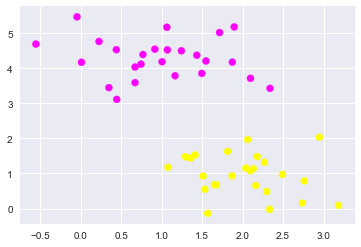

In [141]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

A discriminative classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example, we could come up with several possibilities which perfectly discriminate between the classes in this example:

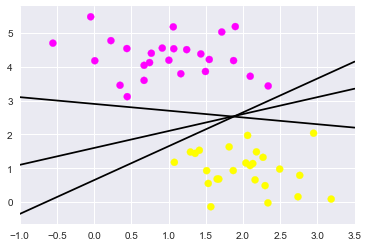

In [142]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

**Support Vector Machines: Maximizing the Margin**

Support vector machines are one way to address this. What support vector machined do is to not only draw a line, but consider a region about the line of some given width. Here's an example of what it might look like:

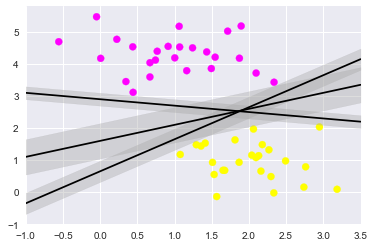

In [143]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Notice here that if we want to maximize this width, the middle fit is clearly the best. This is the intuition of **support vector machines**, which optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

**Fitting a Support Vector Machine**

Now we'll fit a Support Vector Machine Classifier to these points. While the mathematical details of the likelihood model are interesting, we'll let you read about those elsewhere. Instead, we'll just treat the scikit-learn algorithm as a black box which accomplishes the above task.

In [5]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [29]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

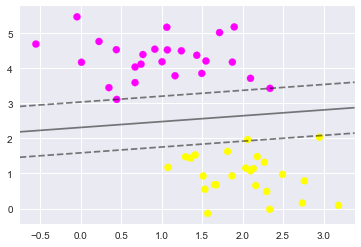

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

Use IPython's interact functionality to explore how the distribution of points affects the support vectors and the discriminative fit:

In [146]:
from IPython.html.widgets import interact

def plot_svm(N=100):
    X, y = make_blobs(n_samples=N, centers=2,
                      random_state=0, cluster_std=0.50)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-5, 8)
    plt.ylim(-5, 10)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240], kernel='linear');

A Jupyter Widget

TODO:

As the number of points increases:
 - how does the slope of the line change?
 - how does the width of the margin change?

How does that change if you set cluster_std to be greater than 1?

**Support Vector Machine with Kernels Classifier**

Kernels are useful when the decision boundary is not linear. A Kernel is some functional transformation of the input data. SVMs have clever tricks to ensure kernel calculations are efficient. In the example below, a linear boundary is not useful in separating the groups of points:

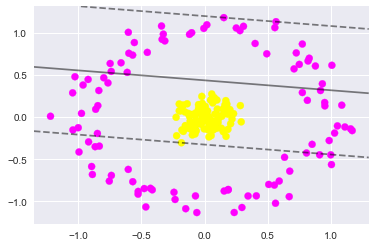

In [151]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

A simple model that could be useful is a radial basis function:

In [152]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, -45, 0, 45, 90], azip=(-180, 180));

A Jupyter Widget



In three dimensions, there is a clear separation between the data. Run the SVM with the rbf kernel:

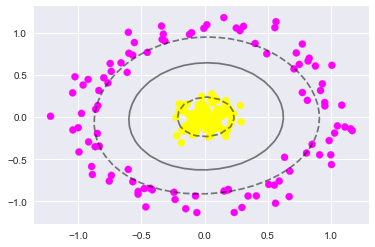

In [154]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [ ]:
"""
TODO check how different kernels impact the behavior of the SVM.

Options are to set kernel={‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, custom_function}
"""

clf = SVC(kernel='TODO')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

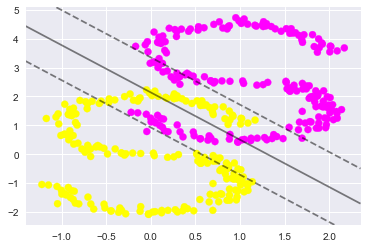

In [155]:
"""
Let's throw SVM for a loop and then help it out

TODO, help SVM separate the S's
"""

from sklearn.datasets.samples_generator import make_s_curve

# Generate first curve
first_curve_X, _ = make_s_curve(200, random_state=0, noise=0.1)
first_curve_X = first_curve_X[:,[0,2]]
first_curve_labels = np.ones(200)

# Generate and shift second curve
second_curve_X, _ = make_s_curve(200, random_state=0, noise=0.1)
second_curve_X = (second_curve_X + np.array([1, 2, 2.5]))
second_curve_X = second_curve_X[:,[0,2]]
second_curve_labels = 1 - np.ones(200)

curves = np.append(first_curve_X, second_curve_X).reshape(400, 2)
labels = np.append(first_curve_labels, second_curve_labels)

clf = SVC(kernel='linear').fit(curves, labels)

plt.scatter(curves[:,0], curves[:, 1], c=labels, s=50, cmap='spring')
plot_svc_decision_function(clf);

SVM additional notes:

When using an SVM you need to choose the right values for parameters such as c and gamma. Model validation can help to determine these optimal values by trial and error.
SVMs run in O(n^3) performance. LinearSVC is scalable, SVC does not seem to be scalable. For large data sets try transforming the data to a smaller space and use LinearSVC with rbf.

For further explanation of c, gamma, and rbf see: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html